In [141]:
import pandas as pd
import numpy as np
import cv2
from ast import literal_eval
import seaborn as sns

In [142]:
screening  = pd.read_csv("DataSet/Screening/data.csv")
screening.drop('Unnamed: 0', axis = 1, inplace= True)

In [143]:
x = screening.iloc[:,:-1]
y = screening.iloc[:,-1]

#### Feature Scaling

In [144]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [145]:
x = scaler.fit_transform(x)

In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, mean_absolute_error, accuracy_score, f1_score
from sklearn.model_selection import train_test_split

In [147]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x,y, test_size=0.1, random_state=42)

#### Logistic Regression

In [148]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [149]:
print("Validation Scores:\n")
scores = cross_val_score(clf, x_valid, y_valid, cv = 10, scoring= 'accuracy')
print('Accuracy: {:.2f} (+/- {:.2f}) %'.format(scores.mean()*100, scores.std() *100))
recall = cross_val_score(clf, x_train, y_train, cv=10, scoring='recall')
print('Recall', np.mean(recall))
precision = cross_val_score(clf, x_train, y_train, cv=10, scoring='precision')
print('Precision', np.mean(precision))
f1 = cross_val_score(clf, x_train, y_train, cv=10, scoring='f1')
print('F1', np.mean(f1))

Validation Scores:

Accuracy: 93.53 (+/- 3.69) %
Recall 0.9920986216268686
Precision 0.9873200444412934
F1 0.9896594273579495


In [150]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [151]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: ")
cm_matrix = confusion_matrix(y_test, y_pred)
print(cm_matrix)

Accuracy: 97.91183294663574
Mean Absolute Error: 0.02088167053364269
F1 Score:  0.9807280513918629
Confusion Matrix: 
[[193   6]
 [  3 229]]


<AxesSubplot:>

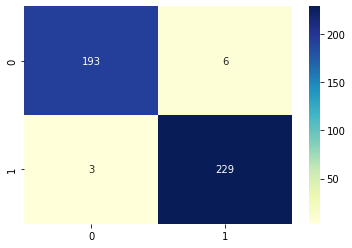

In [152]:
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#### SVM/SVC

In [153]:
from sklearn.svm import SVC
clf = SVC()

In [154]:
print("Validation Scores:\n")
scores = cross_val_score(clf, x_valid, y_valid, cv = 10, scoring= 'accuracy')
print('Accuracy: {:.2f} (+/- {:.2f}) %'.format(scores.mean()*100, scores.std() *100))
recall = cross_val_score(clf, x_valid, y_valid, cv=10, scoring='recall')
print('Recall', np.mean(recall))
precision = cross_val_score(clf, x_valid, y_valid, cv=10, scoring='precision')
print('Precision', np.mean(precision))
f1 = cross_val_score(clf, x_valid, y_valid, cv=10, scoring='f1')
print('F1', np.mean(f1))

Validation Scores:

Accuracy: 92.16 (+/- 5.45) %
Recall 0.890909090909091
Precision 0.9568181818181817
F1 0.9166255559848236


In [155]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [156]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: ")
cm_matrix = confusion_matrix(y_test, y_pred)
print(cm_matrix)

Accuracy: 98.37587006960557
Mean Absolute Error: 0.016241299303944315
F1 Score:  0.9850746268656717
Confusion Matrix: 
[[193   6]
 [  1 231]]


<AxesSubplot:>

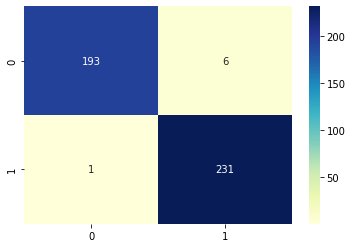

In [157]:
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#### KNN Classifier

In [158]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()

In [159]:
print("Validation Scores:\n")
scores = cross_val_score(clf, x_valid, y_valid, cv = 10, scoring= 'accuracy')
print('Accuracy: {:.2f} (+/- {:.2f}) %'.format(scores.mean()*100, scores.std() *100))
recall = cross_val_score(clf, x_valid, y_valid, cv=10, scoring='recall')
print('Recall', np.mean(recall))
precision = cross_val_score(clf, x_valid, y_valid, cv=10, scoring='precision')
print('Precision', np.mean(precision))
f1 = cross_val_score(clf, x_valid, y_valid, cv=10, scoring='f1')
print('F1', np.mean(f1))

Validation Scores:

Accuracy: 90.30 (+/- 6.23) %
Recall 0.9090909090909092
Precision 0.9128621378621379
F1 0.9052842085450781


In [160]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [161]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: ")
cm_matrix = confusion_matrix(y_test, y_pred)
print(cm_matrix)

Accuracy: 94.19953596287704
Mean Absolute Error: 0.058004640371229696
F1 Score:  0.9469214437367304
Confusion Matrix: 
[[183  16]
 [  9 223]]


<AxesSubplot:>

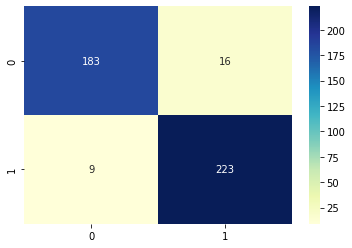

In [162]:
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#### Gaussian Naive Bayes 

In [169]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [170]:
print("Validation Scores:\n")
scores = cross_val_score(clf, x_valid, y_valid, cv = 10, scoring= 'accuracy')
print('Accuracy: {:.2f} (+/- {:.2f}) %'.format(scores.mean()*100, scores.std() *100))
recall = cross_val_score(clf, x_train, y_train, cv=10, scoring='recall')
print('Recall', np.mean(recall))
precision = cross_val_score(clf, x_train, y_train, cv=10, scoring='precision')
print('Precision', np.mean(precision))
f1 = cross_val_score(clf, x_train, y_train, cv=10, scoring='f1')
print('F1', np.mean(f1))

Validation Scores:

Accuracy: 87.01 (+/- 8.53) %
Recall 0.8744515628033392
Precision 0.8959804729700431
F1 0.8842871991863882


In [171]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [172]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: ")
cm_matrix = confusion_matrix(y_test, y_pred)
print(cm_matrix)

Accuracy: 88.63109048723898
Mean Absolute Error: 0.1136890951276102
F1 Score:  0.8941684665226782
Confusion Matrix: 
[[175  24]
 [ 25 207]]


<AxesSubplot:>

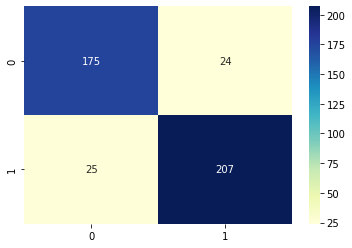

In [173]:
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#### LightGBM

In [163]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(objective= 'mse')

In [164]:
print("Validation Scores:\n")
scores = cross_val_score(clf, x_valid, y_valid, cv = 10, scoring= 'accuracy')
print('Accuracy: {:.2f} (+/- {:.2f}) %'.format(scores.mean()*100, scores.std() *100))
recall = cross_val_score(clf, x_train, y_train, cv=10, scoring='recall')
print('Recall', np.mean(recall))
precision = cross_val_score(clf, x_train, y_train, cv=10, scoring='precision')
print('Precision', np.mean(precision))
f1 = cross_val_score(clf, x_train, y_train, cv=10, scoring='f1')
print('F1', np.mean(f1))

Validation Scores:

Accuracy: 100.00 (+/- 0.00) %
Recall 1.0
Precision 1.0
F1 1.0


In [165]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [166]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: ")
cm_matrix = confusion_matrix(y_test, y_pred)
print(cm_matrix)

Accuracy: 100.0
Mean Absolute Error: 0.0
F1 Score:  1.0
Confusion Matrix: 
[[199   0]
 [  0 232]]


<AxesSubplot:>

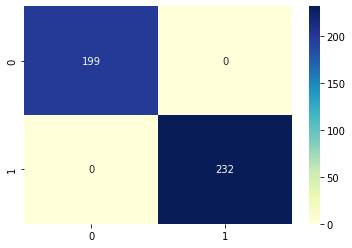

In [167]:
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [168]:
lgb.plot_metric(clf)

TypeError: object of type 'NoneType' has no len()